<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [1]:
#Answer 1
def findPermutation(s):
    n = len(s)
    perm = []
    current = 1
    next_val = n + 1

    for c in s:
        if c == 'I':
            perm.append(current)
            current += 1
        else:  # c == 'D'
            perm.append(next_val)
            next_val -= 1
    
    perm.append(current)
    return perm


In [2]:
s = "IDID"
print(findPermutation(s))


[1, 5, 2, 4, 3]


<aside>
💡 **Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

</aside>

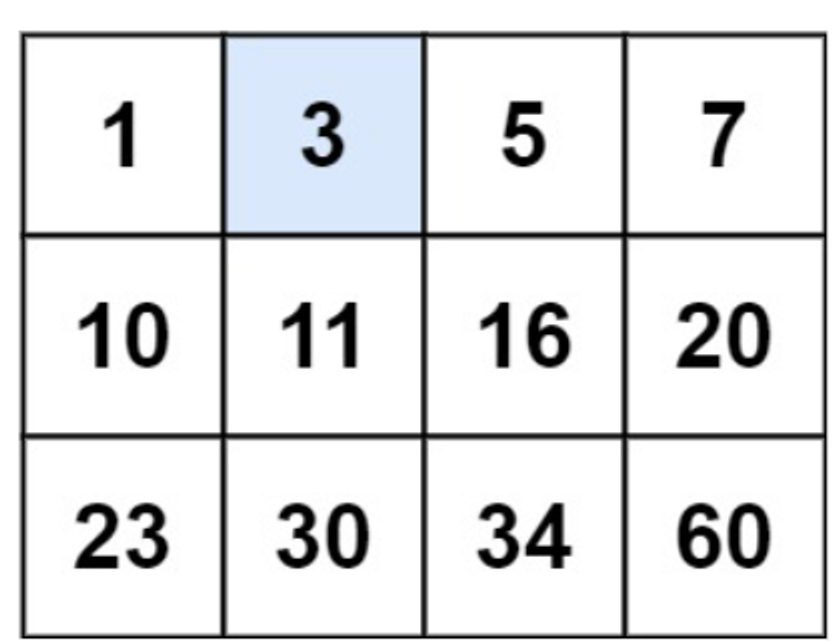

Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

In [4]:
def searchMatrix(matrix, target):
    if not matrix or not matrix[0]:
        return False
    
    m, n = len(matrix), len(matrix[0])
    left, right = 0, m * n - 1
    
    while left <= right:
        mid = (left + right) // 2
        row, col = mid // n, mid % n
        mid_value = matrix[row][col]
        
        if mid_value == target:
            return True
        elif mid_value < target:
            left = mid + 1
        else:
            right = mid - 1
    
    return False


In [5]:
matrix = [
    [1, 3, 5, 7],
    [10, 11, 16, 20],
    [23, 30, 34, 60]
]
target = 3

print(searchMatrix(matrix, target))


True


<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
</aside>

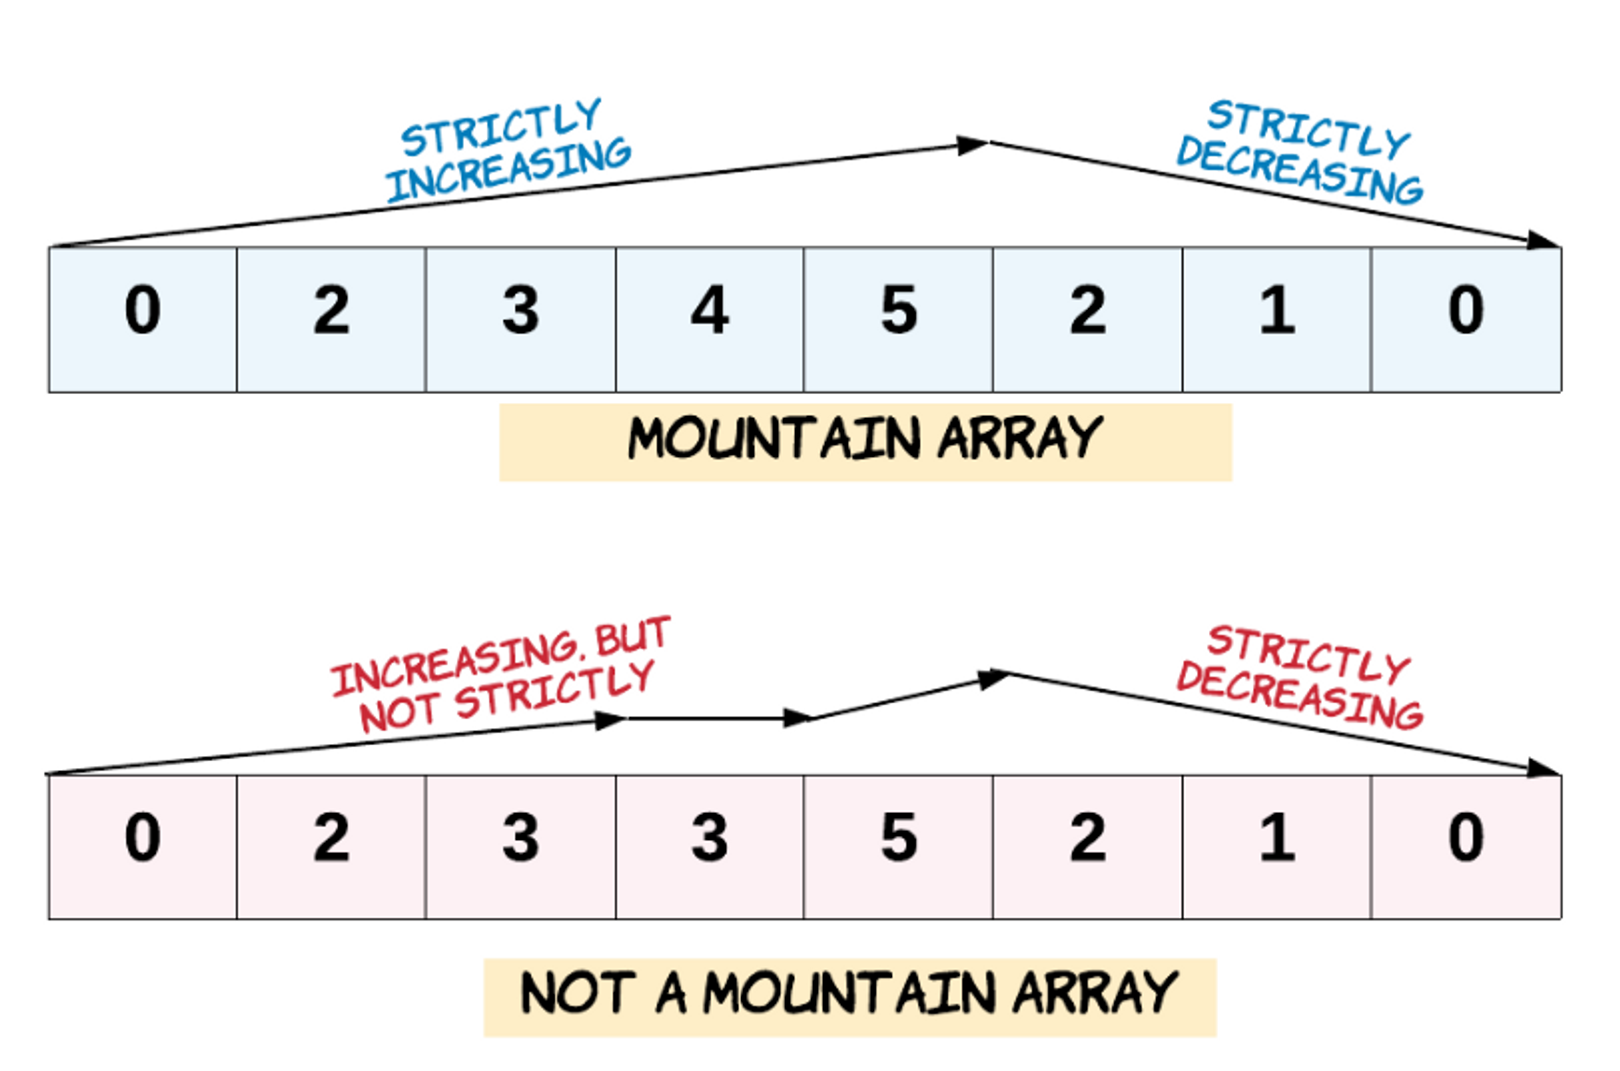

In [6]:
def validMountainArray(arr):
    if len(arr) < 3:
        return False

    left, right = 0, len(arr) - 1

    while left + 1 < len(arr) and arr[left] < arr[left + 1]:
        left += 1

    if left == 0 or left == len(arr) - 1:
        return False

    while right > 0 and arr[right - 1] > arr[right]:
        right -= 1

    if right != left:
        return False

    return left > 0 and right < len(arr) - 1


In [7]:
arr1 = [2, 1]
arr2 = [3, 5, 5]
arr3 = [0, 3, 2, 1]
arr4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
arr5 = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

print(validMountainArray(arr1))  # False
print(validMountainArray(arr2))  # False
print(validMountainArray(arr3))  # True
print(validMountainArray(arr4))  # False
print(validMountainArray(arr5))  # False


False
False
True
False
False


<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

In [8]:
def findMaxLength(nums):
    max_length = 0
    prefix_sum = {0: -1}
    count = 0

    for i in range(len(nums)):
        count += 1 if nums[i] == 1 else -1

        if count in prefix_sum:
            max_length = max(max_length, i - prefix_sum[count])
        else:
            prefix_sum[count] = i

    return max_length


In [9]:
nums = [0, 1]
print(findMaxLength(nums))


2


<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

In [10]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort()
    
    min_product_sum = 0
    
    for i in range(len(nums1)):
        min_product_sum += nums1[i] * nums2[len(nums1) - 1 - i]
    
    return min_product_sum


In [11]:
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
print(minProductSum(nums1, nums2))


40


<aside>
💡 **Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

</aside>

In [16]:
def findOriginalArray(changed):
    if len(changed) % 2 != 0:
        return []
    
    original_set = set()
    
    for num in changed:
        if num / 2 in original_set:
            original_set.remove(num / 2)
        else:
            original_set.add(num)
    
    if len(original_set) == 0:
        return list(original_set)
    else:
        return []


In [17]:
changed = [1, 3, 4, 2, 6, 8]
print(findOriginalArray(changed))


[]


<aside>
💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

</aside>

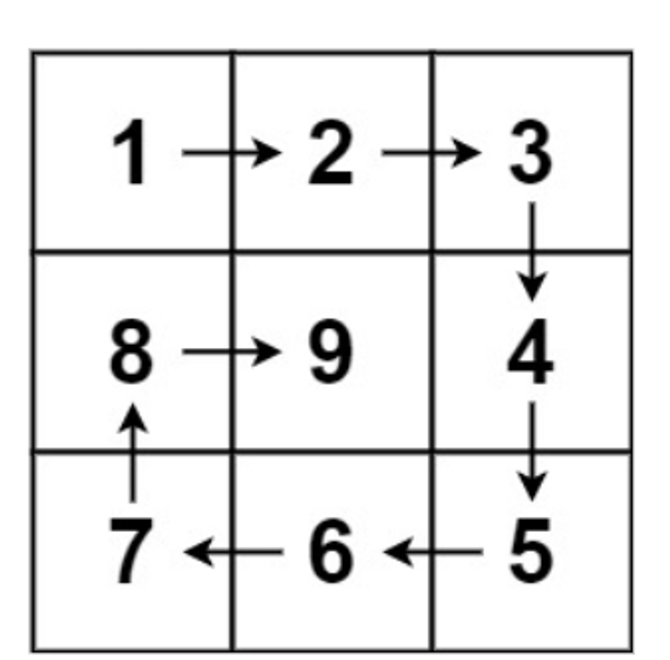

In [18]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    row_start, row_end = 0, n - 1
    col_start, col_end = 0, n - 1
    num = 1
    
    while num <= n**2:
        # Traverse top row
        for j in range(col_start, col_end + 1):
            matrix[row_start][j] = num
            num += 1
        row_start += 1
        
        # Traverse rightmost column
        for i in range(row_start, row_end + 1):
            matrix[i][col_end] = num
            num += 1
        col_end -= 1
        
        # Traverse bottom row
        for j in range(col_end, col_start - 1, -1):
            matrix[row_end][j] = num
            num += 1
        row_end -= 1
        
        # Traverse leftmost column
        for i in range(row_end, row_start - 1, -1):
            matrix[i][col_start] = num
            num += 1
        col_start += 1
    
    return matrix


In [19]:
n = 3
result = generateMatrix(n)
for row in result:
    print(row)


[1, 2, 3]
[8, 9, 4]
[7, 6, 5]


<aside>
💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

</aside>

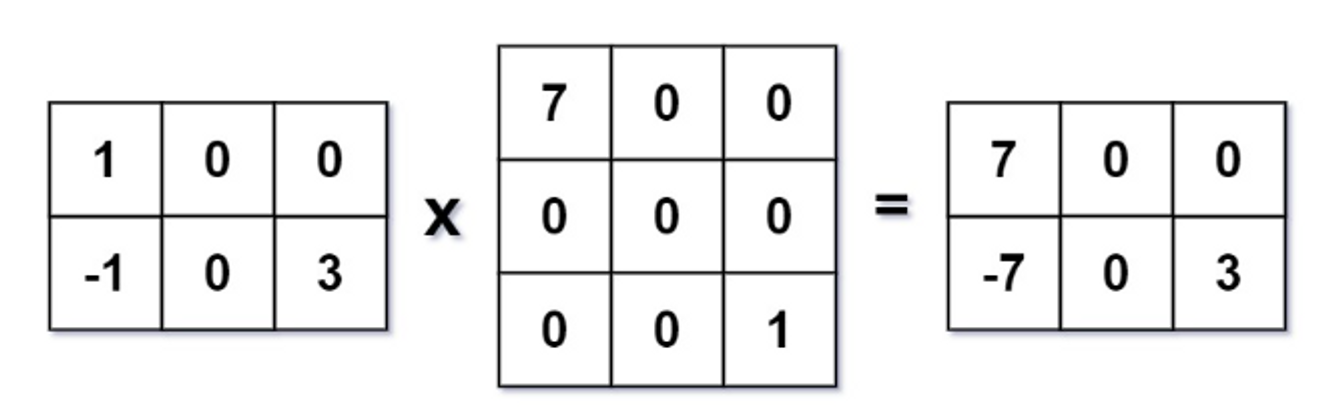

In [20]:
def multiply(mat1, mat2):
    m, k = len(mat1), len(mat1[0])
    n = len(mat2[0])
    result = [[0] * n for _ in range(m)]
    
    for i in range(m):
        for j in range(k):
            if mat1[i][j] != 0:
                for p in range(n):
                    if mat2[j][p] != 0:
                        result[i][p] += mat1[i][j] * mat2[j][p]
    
    return result


In [21]:
mat1 = [[1, 0, 0],
        [-1, 0, 3]]

mat2 = [[7, 0, 0],
        [0, 0, 0],
        [0, 0, 1]]

result = multiply(mat1, mat2)
for row in result:
    print(row)


[7, 0, 0]
[-7, 0, 3]
